In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### explore dataset

In [2]:
df = pd.read_csv('..\data\processed\data_football.csv')
# xem 5 dong dau data
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11400\973027125.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\processed\data_football.csv')


,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,"RW, ST, CF",93,93,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,0.0,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,"ST, LW",92,92,35,187,83,Juventus,Italian Serie A,1.0,...,0.0,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,1.0,...,0.0,12,18,87,92,78,90,90,125000,75000000
3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,0.0,42,19,15,6,12,8,10,240000,80000000
4,Neymar Jr,"LW, CAM",91,91,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,0.0,30,29,9,9,15,15,11,270000,90000000


In [3]:
df['player_positions'].values


array(['RW, ST, CF', 'ST, LW', 'GK', ..., 'CB', 'GK', 'CAM'], dtype=object)

#### number columns

In [4]:
# xem so cot cua data
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'age',
       'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_rank',
       'team_position', 'nationality', 'preferred_foot', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_c

In [5]:
df.shape

(5000, 61)

In [6]:
# xem 10 dong cuoi data
df.tail(5)

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
4995,T. Elyounoussi,"ST, CAM, CM",70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,1.0,...,0.0,33,28,15,8,9,14,7,3000,1400000
4996,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,1.0,...,0.0,15,15,70,70,74,69,69,6000,1100000
4997,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,2.0,...,0.0,68,72,10,12,7,13,15,15000,1100000
4998,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,1.0,...,0.0,13,14,72,70,65,68,71,12000,775000
4999,L. Tomlin,CAM,70,70,31,180,74,Cardiff City,English League Championship,2.0,...,0.0,36,33,9,12,13,12,11,16000,1600000


#### types columns

In [7]:
# Tạo DataFrame chứa kiểu dữ liệu của các cột trong DataFrame data
df_type = pd.DataFrame(data = df.dtypes)

# Lấy các giá trị duy nhất của kiểu dữ liệu
unique_types = df_type[0].unique()

# In ra các kiểu dữ liệu duy nhất
print(unique_types)

[dtype('O') dtype('int64') dtype('float64')]


In [8]:
# count type data culumns is object.
num_obj_columns = list(df.select_dtypes(include=[object]))

In [9]:
# count type data columns is int64
num_non_obj_columns = list(df.select_dtypes(include=['Int64','float64']))
num_non_obj_columns

['overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'league_rank',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkee

#### check miss data.

In [10]:
df.isnull().values.any()

False

In [11]:
data = df[num_non_obj_columns]

#### Plotting Correlation Matrix

<Axes: >

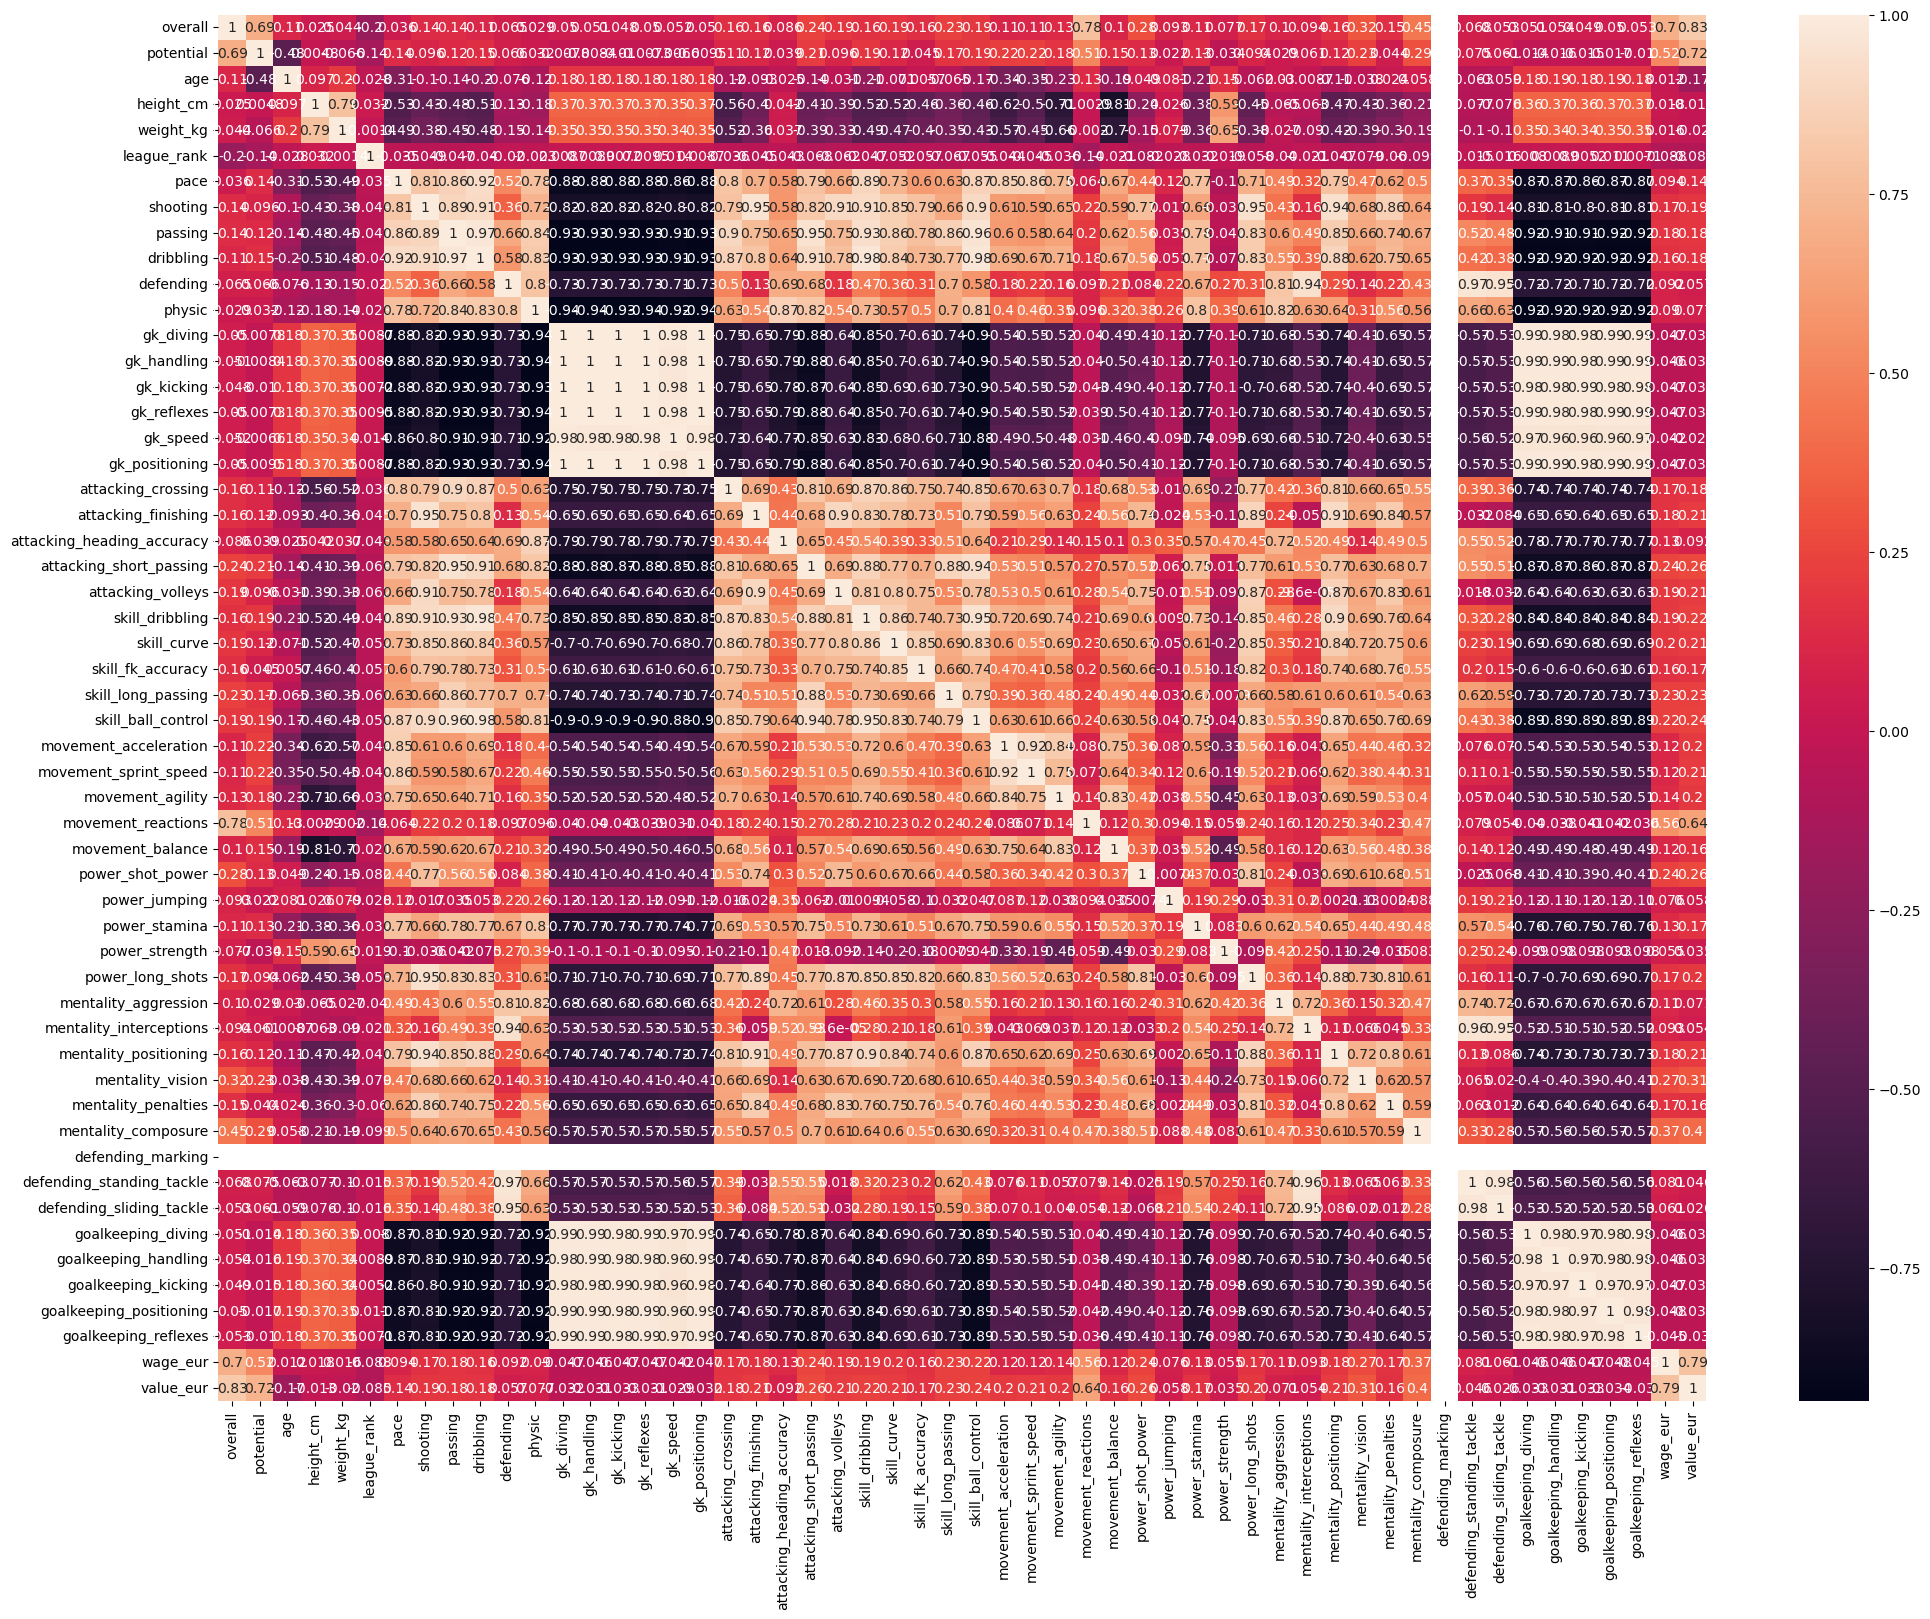

In [12]:
plt.figure(figsize=(24,18)) 
sns.heatmap(data.corr(), annot=True)

#### pairplot

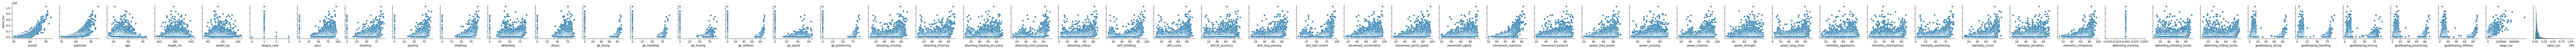

In [13]:
sns.pairplot(data=data,x_vars=num_non_obj_columns, y_vars=['value_eur'])

#### feature selection.

In [14]:
# feature = num_int_columns[:10]
feature = [
 'age',
 'height_cm',
 'weight_kg',
 'league_rank',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes'
]
target = ['value_eur']

In [15]:
X = data[feature]

In [16]:
y = data[target]

#### scatterplot

#### split data test, valid, train

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# valid split 
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### train model

In [19]:
#  train test regression.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_y_pred)
print(f"Mean Squared Error: {mse}")

print(lr_model.score(X_test, y_test))
# print(r2_score(y_test, lr_y_pred))


Mean Squared Error: 28676500810122.188
0.592527972997387


In [20]:
#  train test random forest regressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, rf_y_pred)
print(f"Mean Squared Error: {mse}")

print(rf_model.score(X_test, y_test))
# print(r2_score(y_test, rf_y_pred))

c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

Linear Regression - Mean Squared Error: 31401503529953.9
Linear Regression - R2 Score: 0.553807684591574


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Mean Squared Error: 9970388598606.666
Random Forest - R2 Score: 0.8583280966119837


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble Model - Mean Squared Error: 14687288163999.613
Ensemble Model - R2 Score: 0.791304416149548


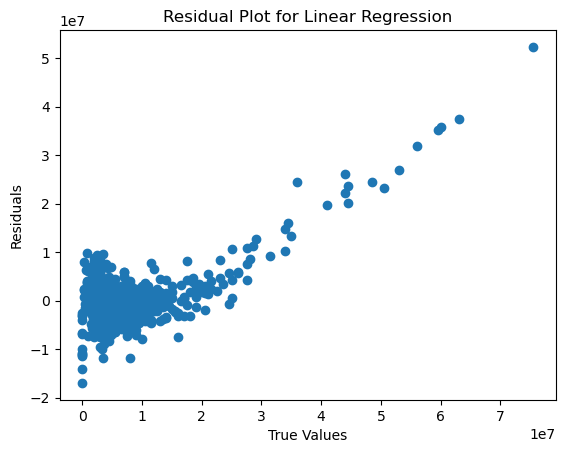

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Giả sử bạn đã có data
# data = pd.read_csv('path_to_your_data.csv')

# Chọn đặc trưng và target
feature = [
    'age', 'height_cm', 'weight_kg', 'league_rank', 'pace', 'shooting',
    'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
    'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
    'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
    'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
    'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
    'mentality_composure', 'defending_marking', 'defending_standing_tackle',
    'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
]
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia train-test-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_val_rfe = rfe.transform(X_val_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

# Huấn luyện mô hình Ensemble (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('lr', lr_model),
    ('rf', rf_model)
])
ensemble_model.fit(X_train_scaled, y_train)
ensemble_y_pred = ensemble_model.predict(X_test_scaled)

# Đánh giá mô hình Ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_y_pred)
r2_ensemble = r2_score(y_test, ensemble_y_pred)
print(f"Ensemble Model - Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model - R2 Score: {r2_ensemble}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()



Linear Regression - Mean Squared Error: 70124737900031.445
Linear Regression - R2 Score: 0.0035789483399308875
Ridge Regression - Mean Squared Error: 69589985024045.89
Ridge Regression - R2 Score: 0.011177394181217104
Lasso Regression - Mean Squared Error: 68987230009614.68
Lasso Regression - R2 Score: 0.019742100493975512


c:\Users\Admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+17, tolerance: 2.669e+13
  model = cd_fast.enet_coordinate_descent(


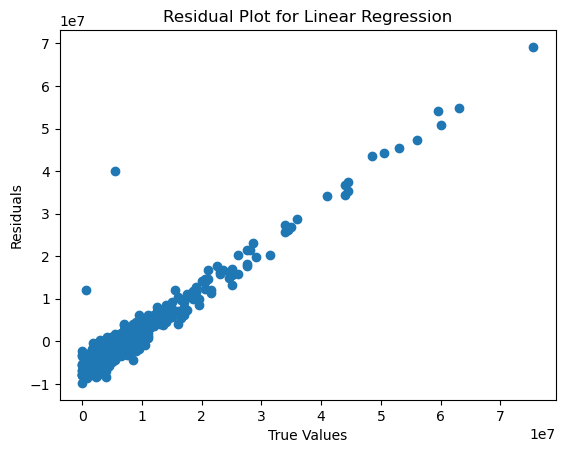

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Giả sử bạn đã có data
# data = pd.read_csv('path_to_your_data.csv')

# Chọn đặc trưng và target
feature = [
    'overall',
    'potential','age', 'height_cm', 'weight_kg', 'league_rank', 'pace', 'shooting',
    'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
    'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
    'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
    'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
    'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
    'mentality_composure', 'defending_marking', 'defending_standing_tackle',
    'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes','wage_eur'
]
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia train-test-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thêm các đặc trưng đa thức
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_poly, y_train)
X_val_rfe = rfe.transform(X_val_poly)
X_test_rfe = rfe.transform(X_test_poly)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_rfe, y_train)
ridge_y_pred = ridge_model.predict(X_test_rfe)

# Đánh giá mô hình Ridge Regression
mse_ridge = mean_squared_error(y_test, ridge_y_pred)
r2_ridge = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")

# Huấn luyện mô hình Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_rfe, y_train)
lasso_y_pred = lasso_model.predict(X_test_rfe)

# Đánh giá mô hình Lasso Regression
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
r2_lasso = r2_score(y_test, lasso_y_pred)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()
